## Task 1: Dataset Selection

Data Preprocessing:
- Use visualizations (histograms, scatter plots, bar graphs, etc.) to understand the
distribution of features and identify any potential patterns/dependencies or
outliers.
- Identify the data types of each feature (numeric, categorical, text, etc.). For
numeric data, show its characteristics like mean, median, standard deviation, etc.
- Identify and handle missing values (null values) in the data. This could involve
removing rows with missing values, fixing missing values with appropriate
strategies, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import math

### Loading  Data 

In [2]:
df = pd.read_csv("HCV-Egy-Data.csv")


In [3]:
class Neuron:
    def __init__(self, number_of_inputs,inputs):
        self.number_of_inputs = number_of_inputs
        self.weights = []
        self.inputs = inputs
        self.bias = random.uniform(-1, 1) 
        # self.bias = 1
        for i in range(number_of_inputs):
            self.weights.append(random.uniform(-1, 1) )
            # self.weights.append(1)

    def setInputs(self,inputs):
        self.inputs = inputs
        
    def Z(self):
        z = 0
        for i in range(self.number_of_inputs):
            z += self.weights[i] * self.inputs[i]
        z += self.bias
        return z
    
    def sigmoid(self):
        return 1 / (1 + np.exp(-self.Z()))
    
    def differentiationOfSigmoid(self):
        return self.sigmoid() * (1 - self.sigmoid())
    
    def differentiationOfZ(self,target): # w1674368   x468287  y4893804   w3   x5   y8
        index = int(target[1:]) -1
        if "w" in target.lower():
            return self.inputs[index]
        elif "y" in target.lower() or "x" in target.lower():
            # Your code here
            return self.weights[index]
    def __str__(self) -> str:
        return str(self.weights) + " " + str(self.bias)

### Data Exploration

array([[<Axes: title={'center': 'Age '}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Nausea/Vomting'}>],
       [<Axes: title={'center': 'Headache '}>,
        <Axes: title={'center': 'Diarrhea '}>,
        <Axes: title={'center': 'Fatigue & generalized bone ache '}>,
        <Axes: title={'center': 'Jaundice '}>,
        <Axes: title={'center': 'Epigastric pain '}>],
       [<Axes: title={'center': 'WBC'}>, <Axes: title={'center': 'RBC'}>,
        <Axes: title={'center': 'HGB'}>,
        <Axes: title={'center': 'Plat'}>,
        <Axes: title={'center': 'AST 1'}>],
       [<Axes: title={'center': 'ALT 1'}>,
        <Axes: title={'center': 'ALT4'}>,
        <Axes: title={'center': 'ALT 12'}>,
        <Axes: title={'center': 'ALT 24'}>,
        <Axes: title={'center': 'ALT 36'}>],
       [<Axes: title={'center': 'ALT 48'}>,
        <Axes: title={'center': 'ALT after 24 w'

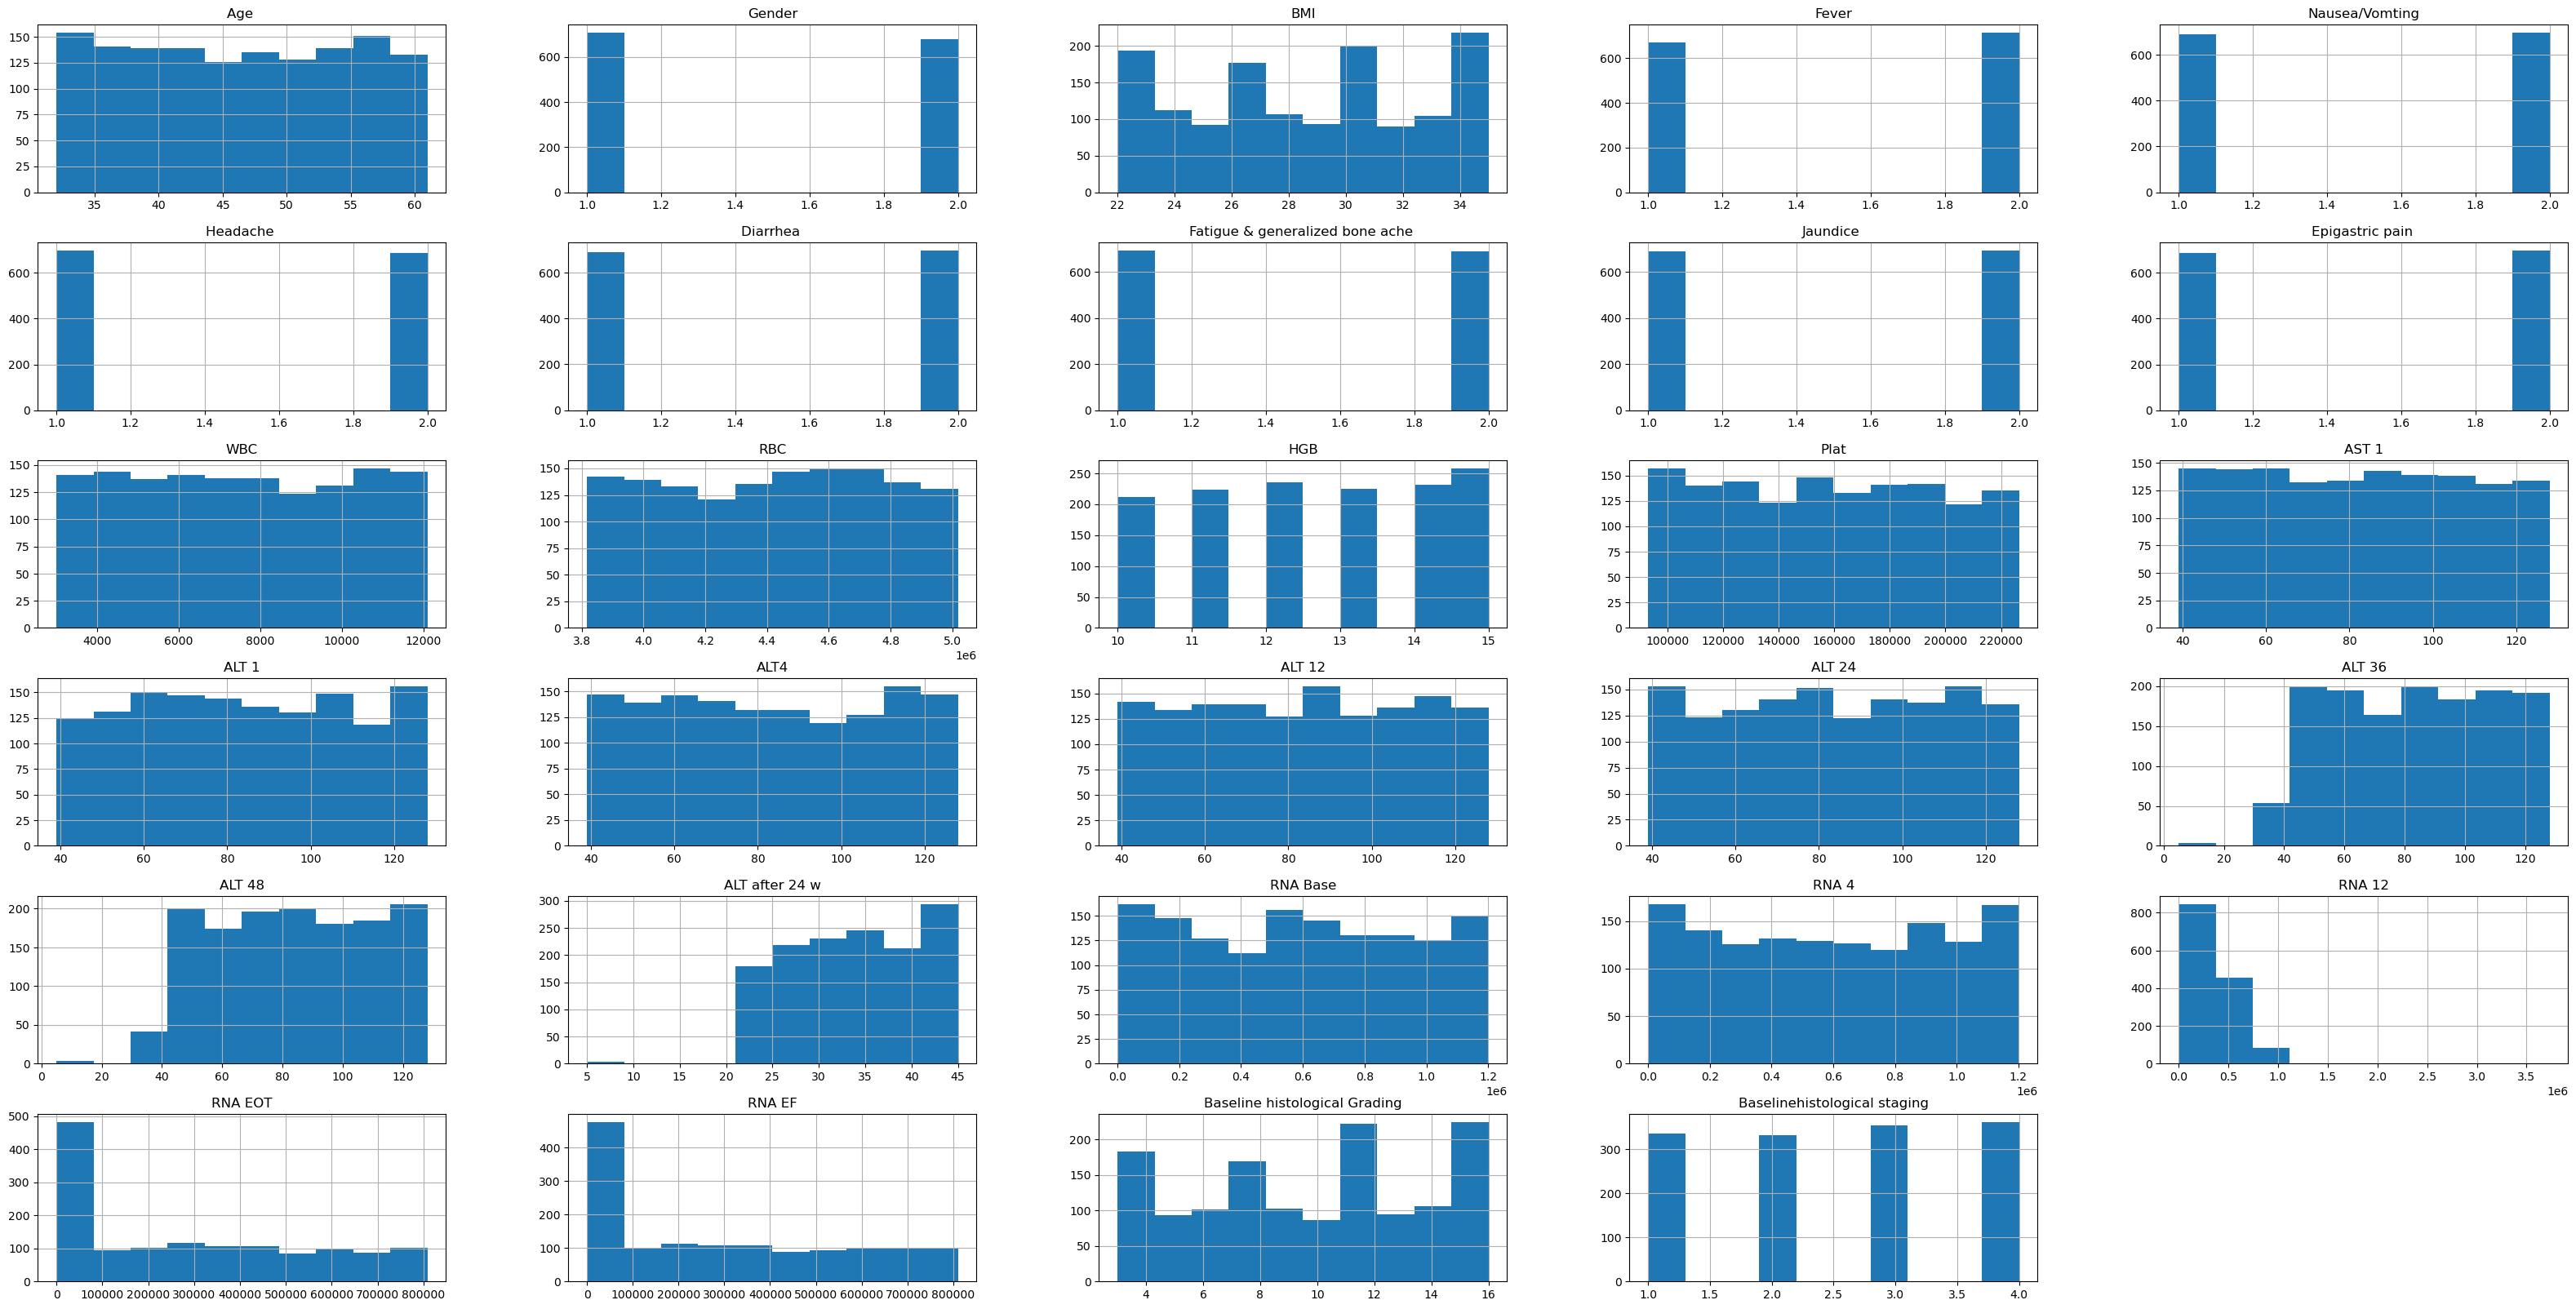

In [4]:
df.hist(figsize=(40,20))

<Axes: >

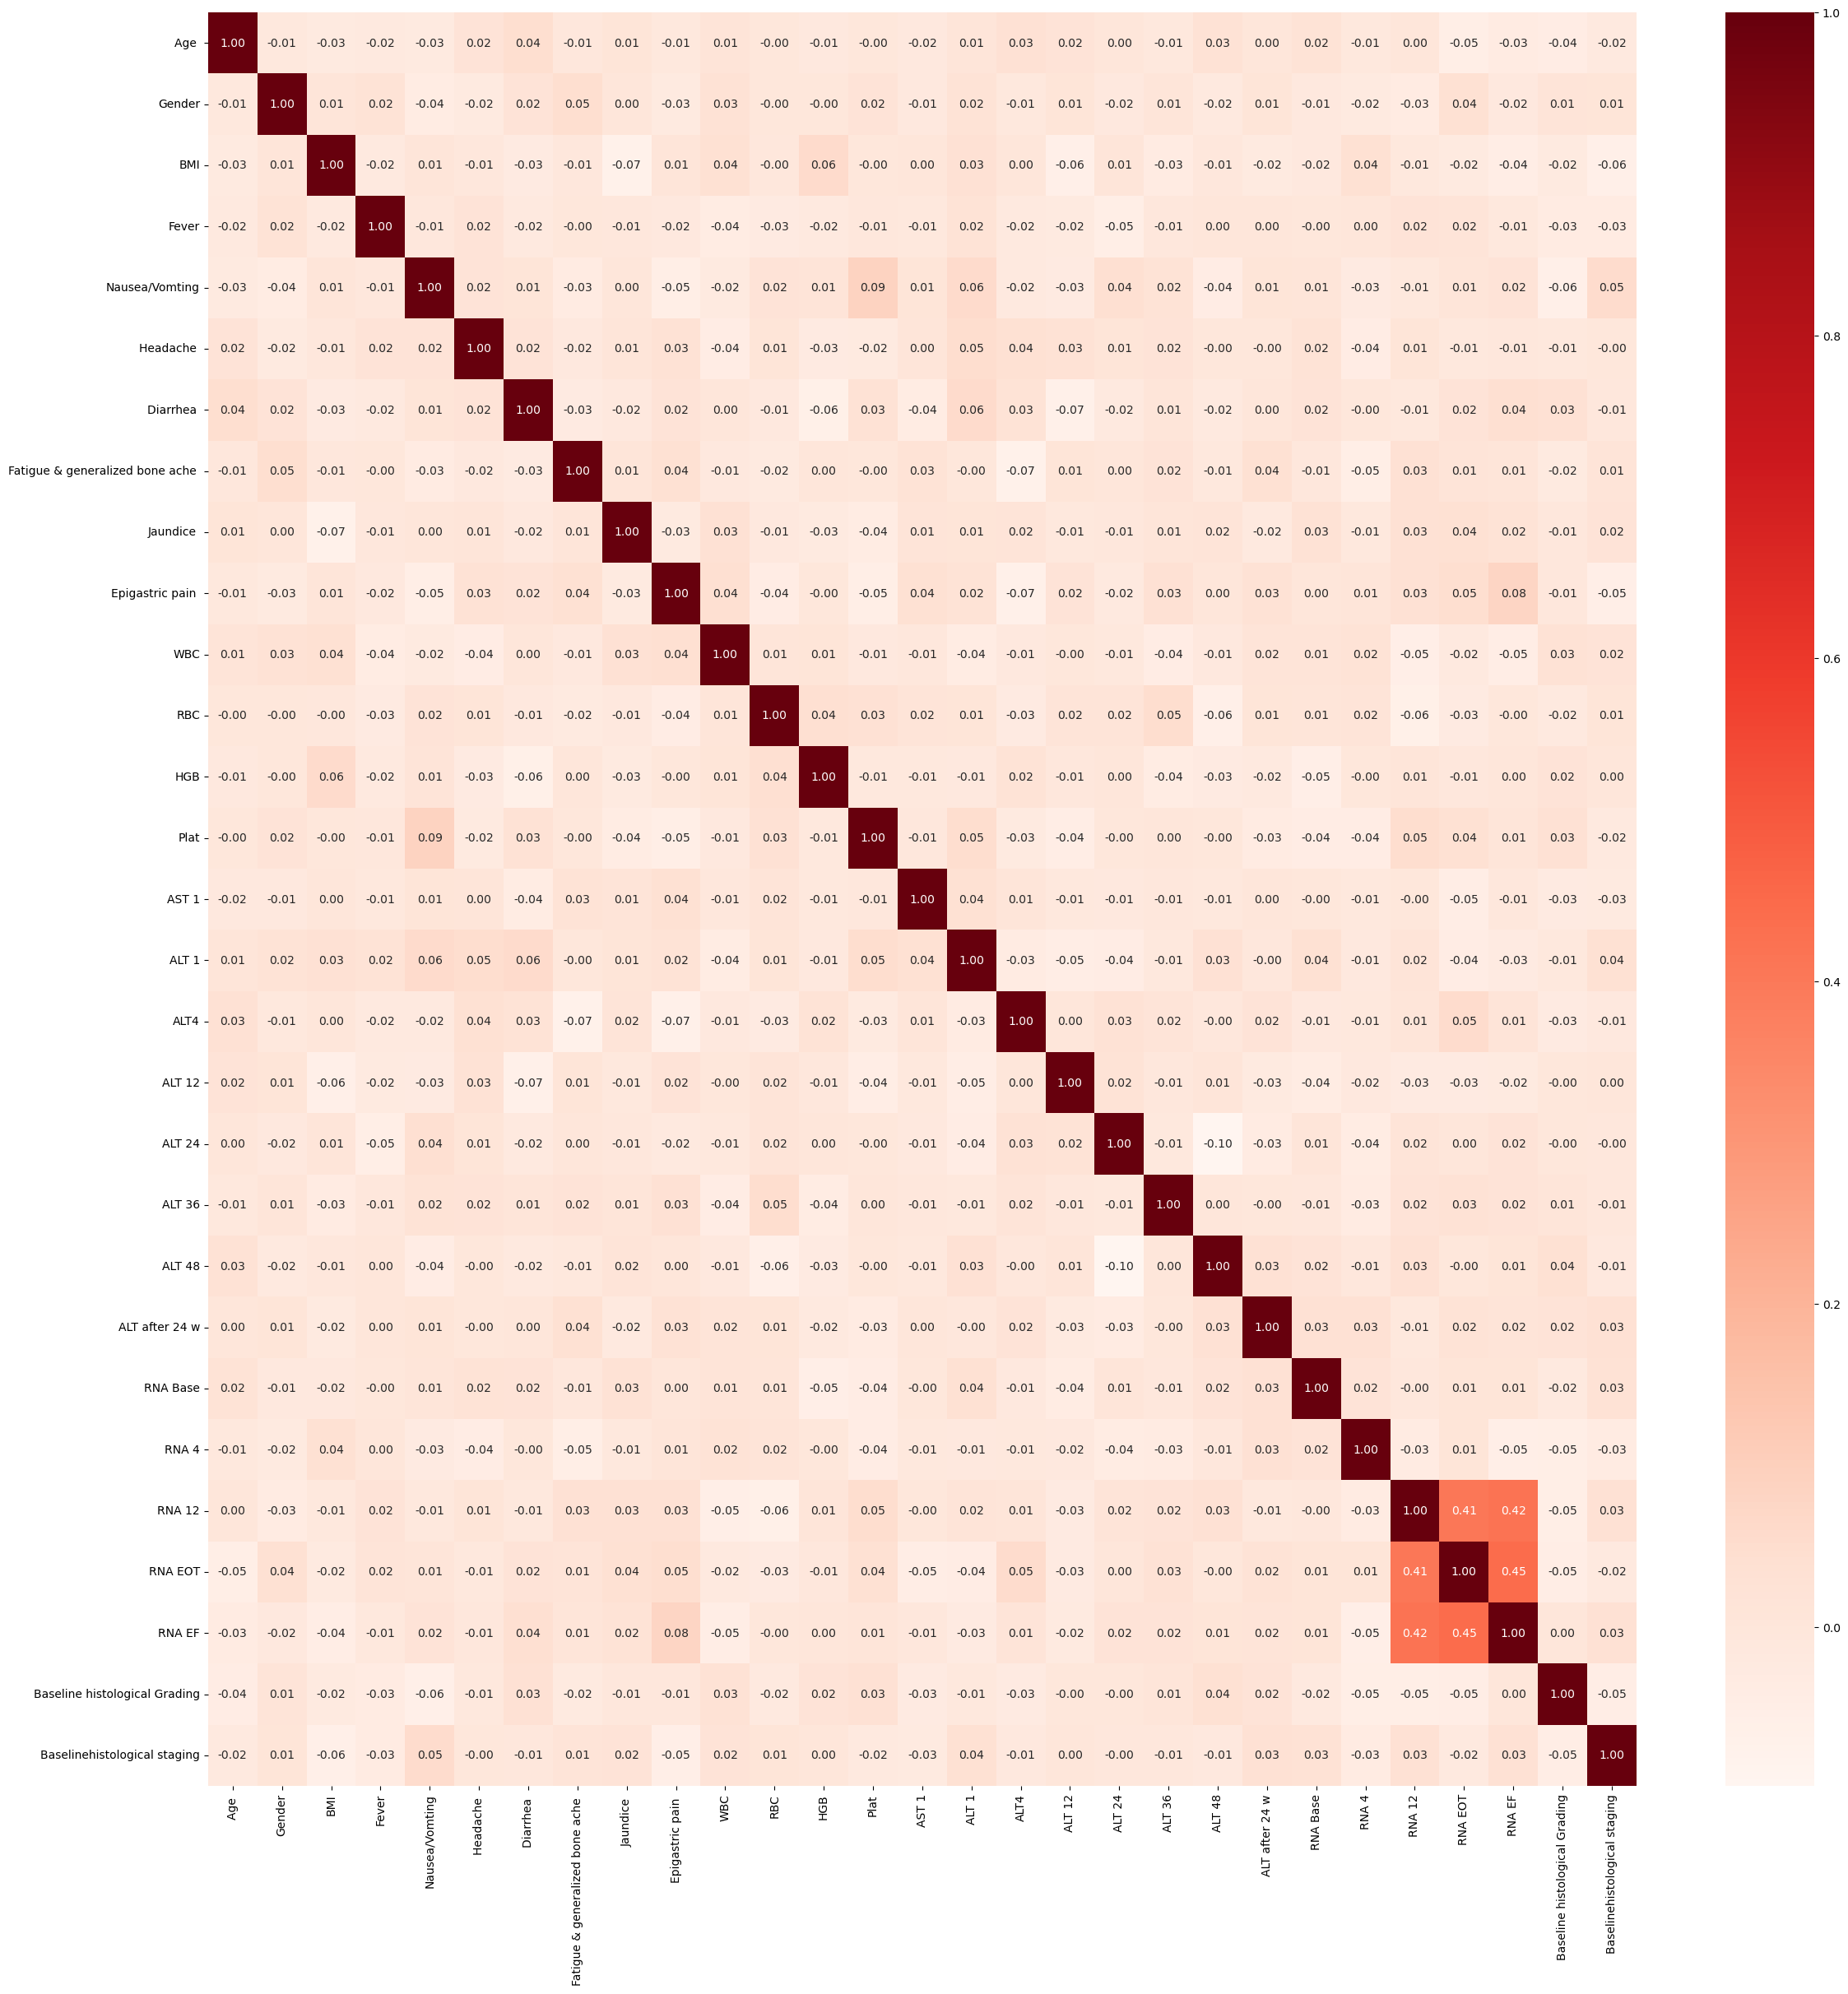

In [5]:
plt.figure(figsize=(28, 28))  # Adjust the width and height as needed

sns.heatmap(df.corr(), cmap='Reds', annot=True, fmt='.2f')

In [6]:
df.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

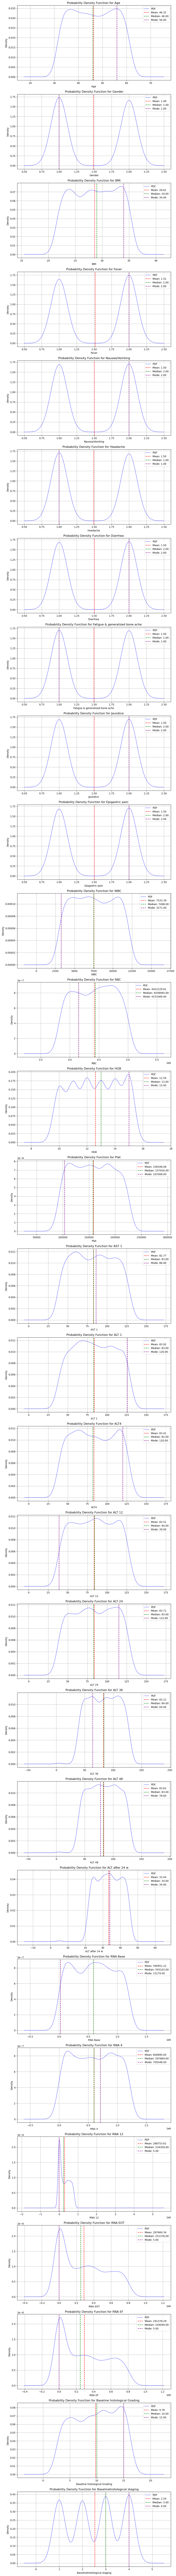

In [7]:
num_features = 29
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(df):
    # Plotting the density
    df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean , color='red', linestyle='--', label=f'Mean: {mean:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=median, color='green', linestyle='--', label=f'Median: {median:.2f}')  # Adjusted y-value for visibility
    axes[i].axvline(x=mode , color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  # Adjusted y-value for visibility

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [9]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [ ]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
features = ['WBC','RBC','Plat','RNA Base','RNA 4','RNA 12','RNA EOT','RNA EF']
s = ['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging']
sc = MinMaxScaler()
df[s] = sc.fit_transform(df[s])

In [11]:
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,0.493763,0.489531,0.508359,0.515523,0.502527,0.496029,0.502527,0.498917,0.501083,0.503971,0.498615,0.503904,0.517545,0.489581,0.491851,0.504677,0.498941,0.500118,0.502349,0.635103,0.639265,0.710957,0.492009,0.500030,0.077381,0.355813,0.359575,0.520133,0.512154
std,0.302811,0.500071,0.313555,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,0.292889,0.288144,0.342702,0.290704,0.292059,0.291267,0.298087,0.292859,0.294449,0.214626,0.213203,0.176839,0.294682,0.301500,0.076470,0.327245,0.330361,0.309530,0.373797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241379,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.244566,0.253698,0.200000,0.235787,0.235955,0.258427,0.247191,0.235955,0.247191,0.455285,0.455285,0.575000,0.224168,0.225419,0.000000,0.000000,0.000000,0.230769,0.333333
50%,0.482759,0.000000,0.538462,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.494731,0.517494,0.600000,0.486343,0.494382,0.494382,0.483146,0.505618,0.494382,0.642276,0.634146,0.725000,0.493801,0.497511,0.062804,0.310931,0.301167,0.538462,0.666667
75%,0.758621,1.000000,0.769231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.758617,0.752775,0.800000,0.729114,0.741573,0.752809,0.764045,0.752809,0.764045,0.821138,0.821138,0.875000,0.738322,0.756495,0.140643,0.640490,0.651414,0.769231,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   float64
 1   Gender                            1385 non-null   float64
 2   BMI                               1385 non-null   float64
 3   Fever                             1385 non-null   float64
 4   Nausea/Vomting                    1385 non-null   float64
 5   Headache                          1385 non-null   float64
 6   Diarrhea                          1385 non-null   float64
 7   Fatigue & generalized bone ache   1385 non-null   float64
 8   Jaundice                          1385 non-null   float64
 9   Epigastric pain                   1385 non-null   float64
 10  WBC                               1385 non-null   float64
 11  RBC                               1385 non-null   float64
 12  HGB   

Age                                    Axes(0.125,0.814746;0.227941x0.0652542)
Gender                              Axes(0.398529,0.814746;0.227941x0.0652542)
BMI                                 Axes(0.672059,0.814746;0.227941x0.0652542)
Fever                                  Axes(0.125,0.736441;0.227941x0.0652542)
Nausea/Vomting                      Axes(0.398529,0.736441;0.227941x0.0652542)
Headache                            Axes(0.672059,0.736441;0.227941x0.0652542)
Diarrhea                               Axes(0.125,0.658136;0.227941x0.0652542)
Fatigue & generalized bone ache     Axes(0.398529,0.658136;0.227941x0.0652542)
Jaundice                            Axes(0.672059,0.658136;0.227941x0.0652542)
Epigastric pain                        Axes(0.125,0.579831;0.227941x0.0652542)
WBC                                 Axes(0.398529,0.579831;0.227941x0.0652542)
RBC                                 Axes(0.672059,0.579831;0.227941x0.0652542)
HGB                                    Axes(0.125,0.

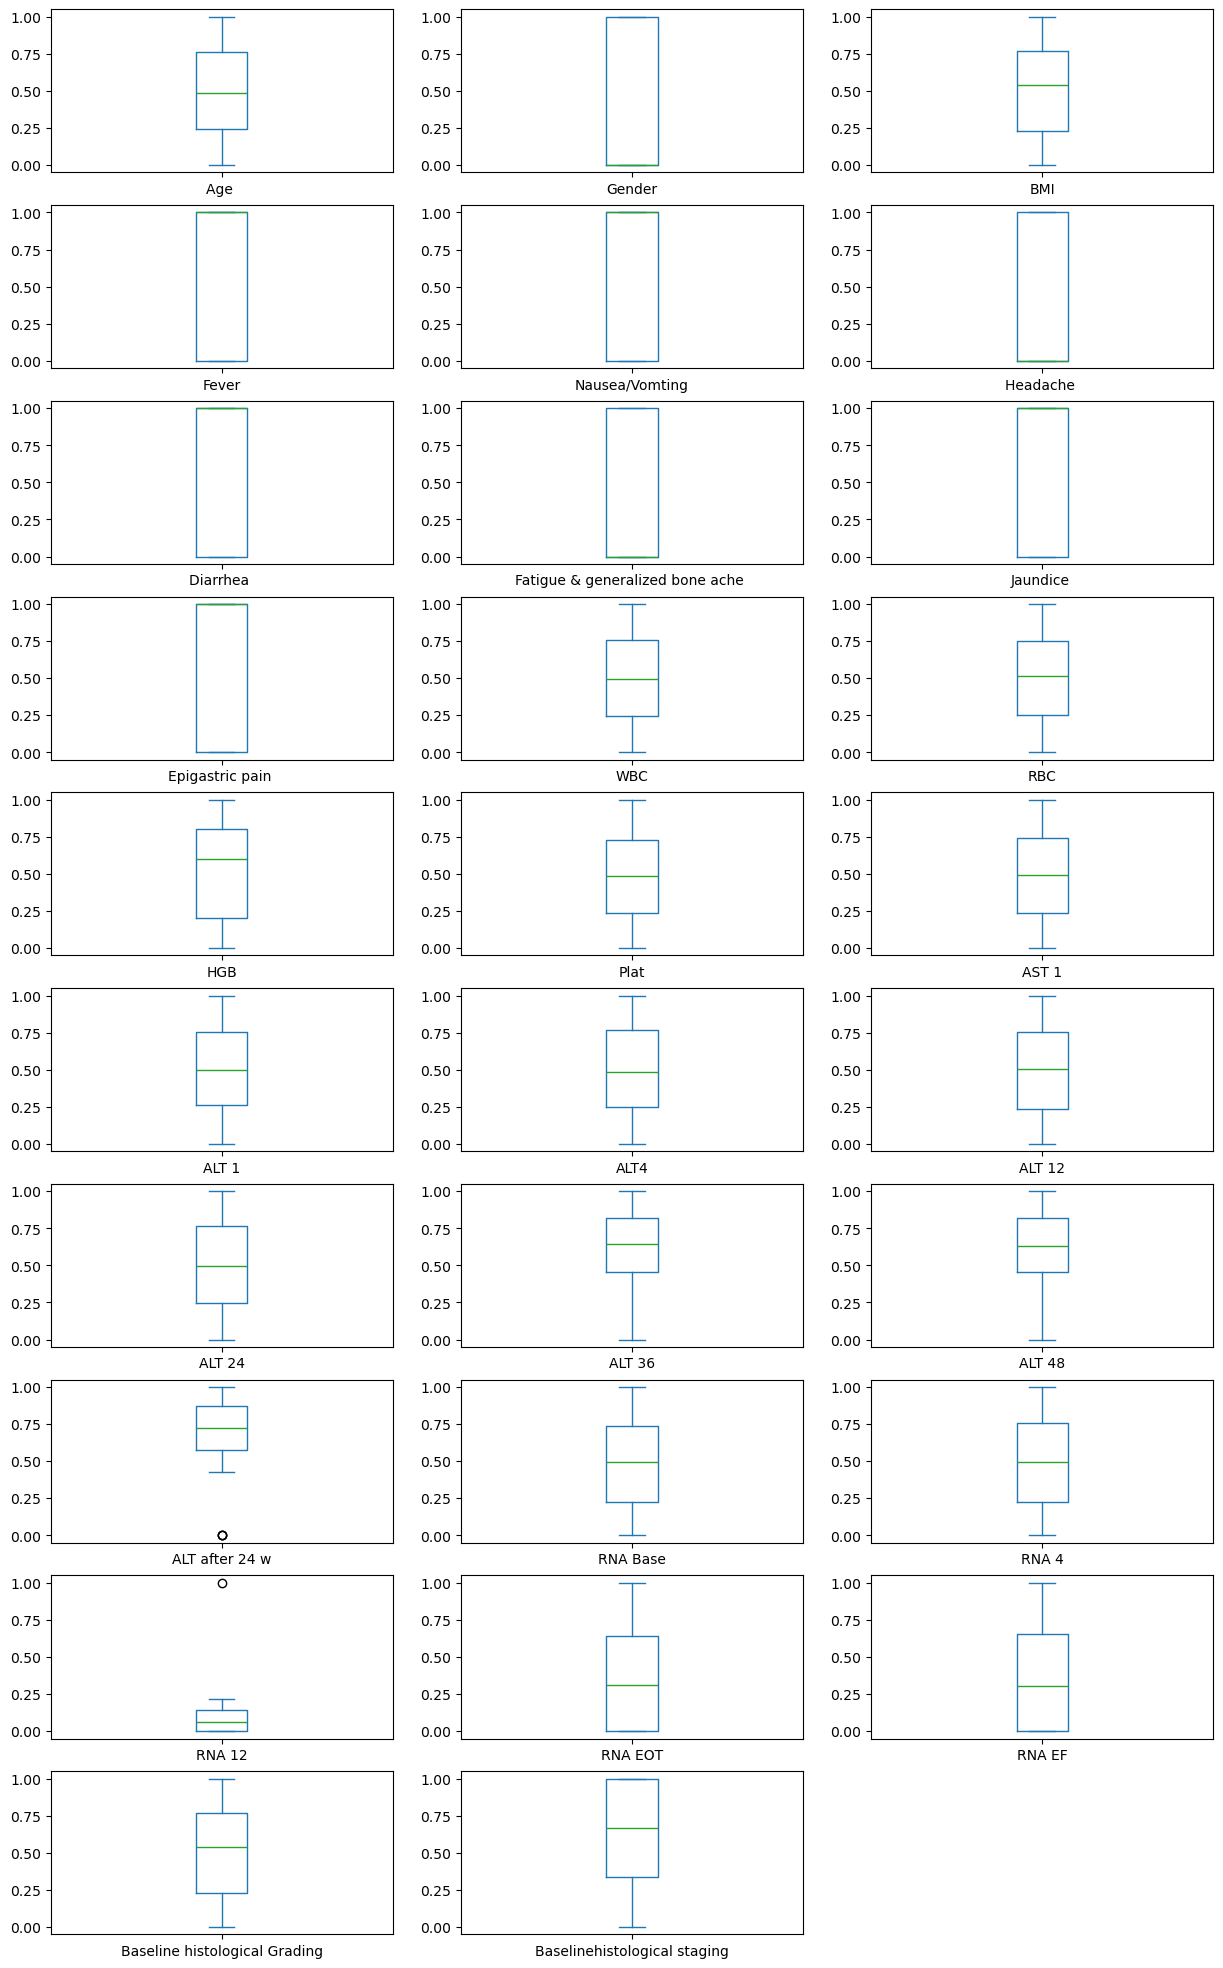

In [13]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(10,3), figsize=(15,25))

Age                                    Axes(0.125,0.814746;0.227941x0.0652542)
Gender                              Axes(0.398529,0.814746;0.227941x0.0652542)
BMI                                 Axes(0.672059,0.814746;0.227941x0.0652542)
Fever                                  Axes(0.125,0.736441;0.227941x0.0652542)
Nausea/Vomting                      Axes(0.398529,0.736441;0.227941x0.0652542)
Headache                            Axes(0.672059,0.736441;0.227941x0.0652542)
Diarrhea                               Axes(0.125,0.658136;0.227941x0.0652542)
Fatigue & generalized bone ache     Axes(0.398529,0.658136;0.227941x0.0652542)
Jaundice                            Axes(0.672059,0.658136;0.227941x0.0652542)
Epigastric pain                        Axes(0.125,0.579831;0.227941x0.0652542)
WBC                                 Axes(0.398529,0.579831;0.227941x0.0652542)
RBC                                 Axes(0.672059,0.579831;0.227941x0.0652542)
HGB                                    Axes(0.125,0.

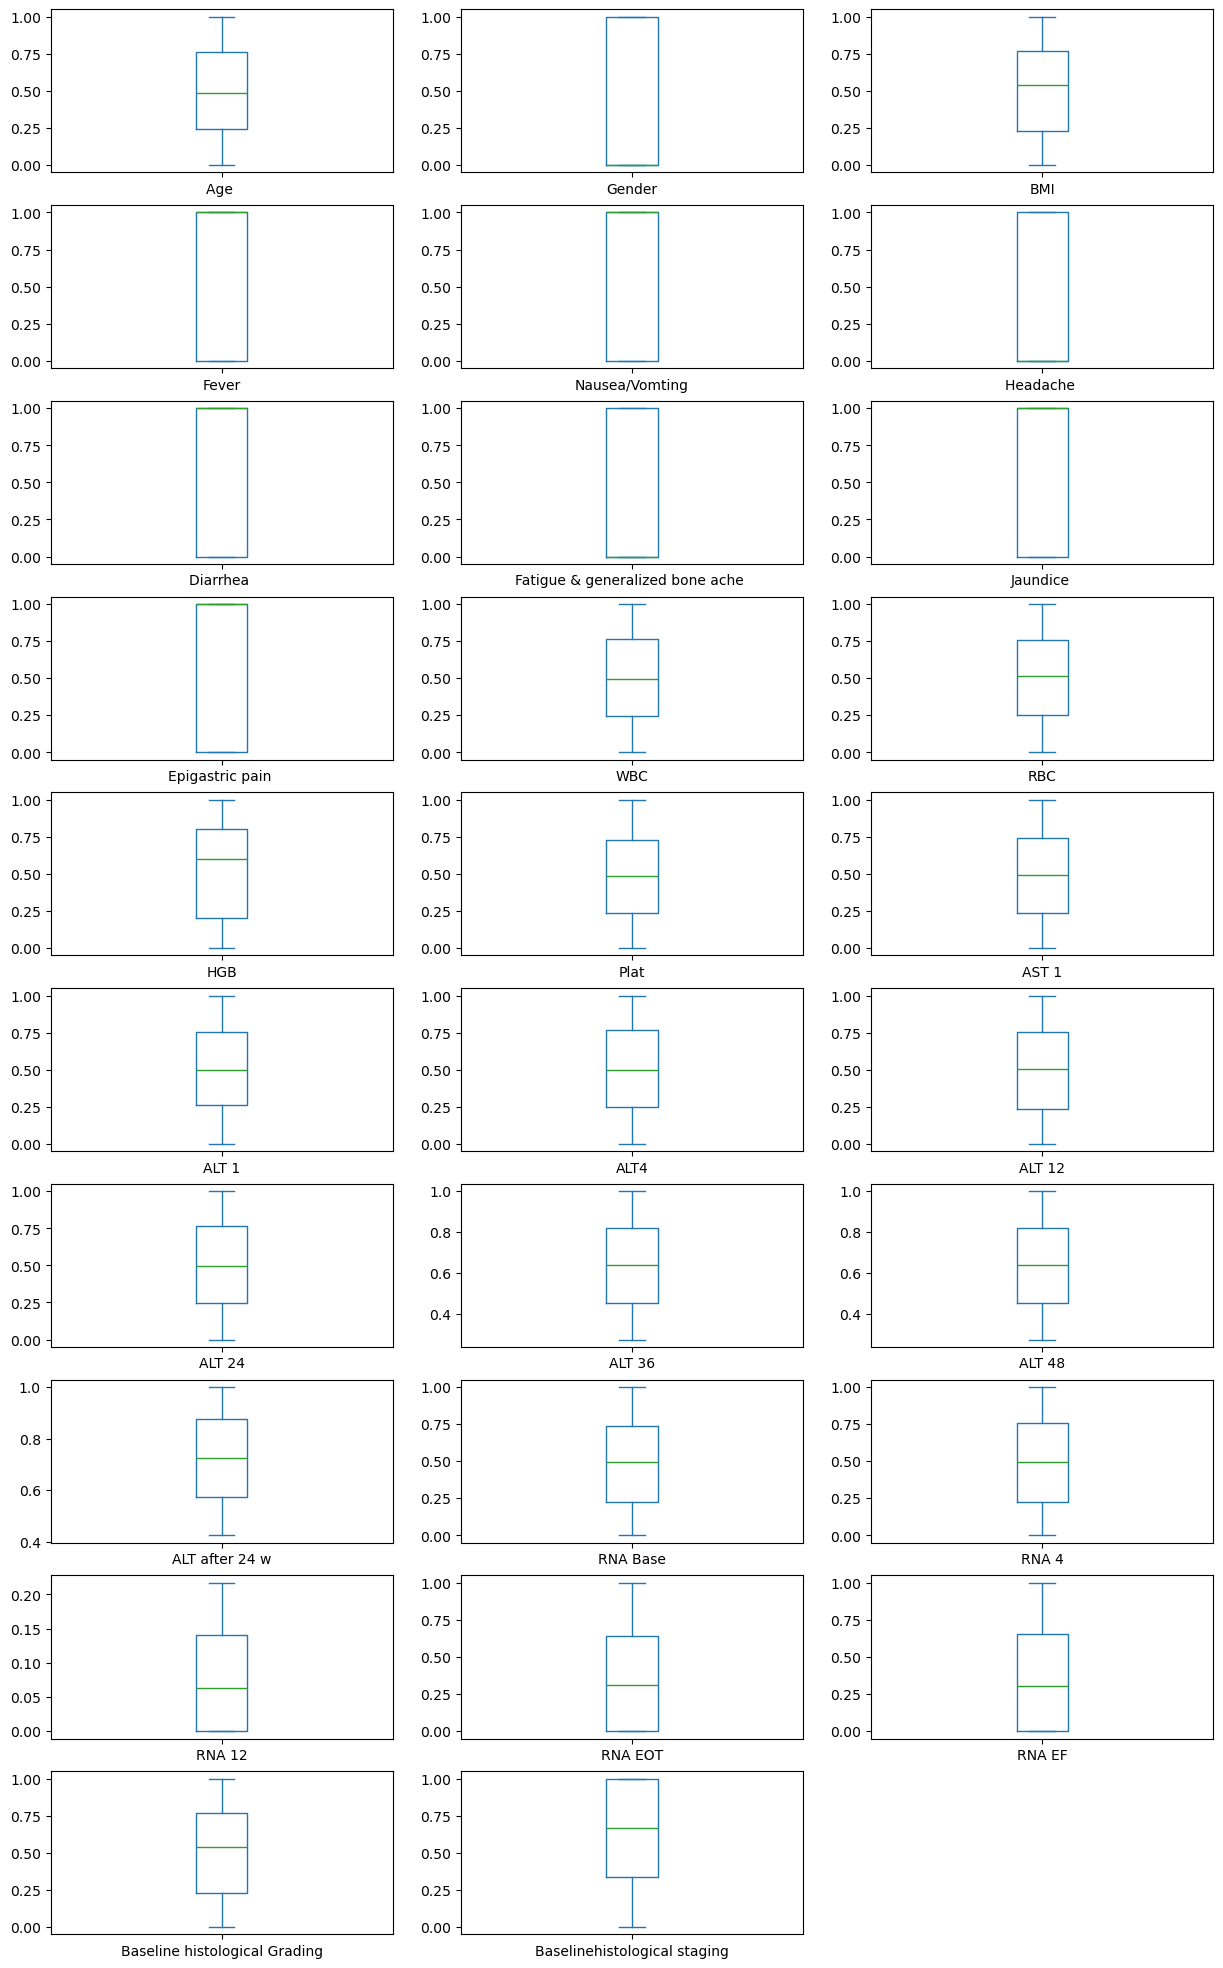

In [14]:
Q1 = np.percentile(df['ALT after 24 w'], 25)
Q3 = np.percentile(df['ALT after 24 w'], 75)
IQR = Q3 - Q1
df = df[(df['ALT after 24 w'] >= Q1 - 1.5 * IQR) & (df['ALT after 24 w'] <= Q3 + 1.5 * IQR)]

Q1 = np.percentile(df['RNA 12'], 25)
Q3 = np.percentile(df['RNA 12'], 75)
IQR = Q3 - Q1
df = df[(df['RNA 12'] >= Q1 - 1.5 * IQR) & (df['RNA 12'] <= Q3 + 1.5 * IQR)]

df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(10,3), figsize=(15,25))

# Task 2: Update NN weights using Genetic Algorithm

### Shuffle and split data

In [15]:
shuffled_data = df.sample(frac=1)
"""
This script performs the following operations on a DataFrame `df`:

1. Shuffles the DataFrame.
2. Splits the DataFrame into features (X) and target (Y).
3. Splits the data into training and testing sets with a 70-30 split.
4. Further splits the testing set into validation and final test sets with a 2/3-1/3 split.

Variables:
    shuffled_data (DataFrame): The shuffled DataFrame.
    X (ndarray): Feature matrix.
    Y (ndarray): Target vector.
    X_train (ndarray): Training feature matrix.
    m_test (ndarray): Intermediate test feature matrix.
    Y_train (ndarray): Training target vector.
    my_test (ndarray): Intermediate test target vector.
    X_validate (ndarray): Validation feature matrix.
    X_test (ndarray): Final test feature matrix.
    Y_validate (ndarray): Validation target vector.
    Y_test (ndarray): Final test target vector.
"""

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

X_train, m_test, Y_train, my_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

X_validate, X_test, Y_validate, Y_test = train_test_split(m_test, my_test, test_size = 1/3, random_state = 0)


### Build Neural Network

In [29]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

sigs = np.vectorize(sigmoid)

def targetToVector(target):
   """
   Converts a target integer into a one-hot encoded vector of length 4.

   Args:
      target (int): The target integer, expected to be in the range 1 to 4.

   Returns:
      list: A one-hot encoded list of length 4, where the position corresponding 
         to the target integer is set to 1, and all other positions are set to 0.

   Example:
      >>> targetToVector(3)
      [0, 0, 1, 0]
   """
   return [1 if i+1 == target else 0 for i in range(4)]
   # return [1 if i+1 == target else 0 for i in range(1)]

def fitness(predictedVector, targetVector):
   """
   Calculate the fitness score by computing the sum of absolute differences 
   between the predicted vector and the target vector.

   Args:
      predictedVector (list of float): The predicted values.
      targetVector (list of float): The actual target values.

   Returns:
      float: The fitness score, which is the sum of absolute differences 
      between the predicted and target vectors.
   """
   return sum([abs(targetVector[i] - predictedVector[i]) for i in range(len(predictedVector))])


def randomPopulation(size=500):
   """
   Generates a random population of neural network weights and biases.

   Args:
      size (int): The number of neural networks to generate. Default is 500.

   Returns:
      tuple: A tuple containing four elements:
         - W1s (list of list of list of float): Weights for the first layer of each neural network.
         - W2s (list of list of list of float): Weights for the second layer of each neural network.
         - B1s (list of list of float): Biases for the first layer of each neural network.
         - B2s (list of list of float): Biases for the second layer of each neural network.
   """
   W1s = [[[random.uniform(-10, 10) for i in range(28)] for j in range(10)] for count in range(size)]
   W2s = [[[random.uniform(-10, 10) for i in range(10)] for j in range(4)] for count in range(size)]
   B1s = [[random.uniform(-5, 5) for i in range(10)] for count in range(size)]
   B2s = [[random.uniform(-5, 5) for i in range(4)] for count in range(size)]
   return W1s, W2s, B1s, B2s

def crossoverWeights(rate, population):
    """
   Perform crossover on a population of genetic algorithms.
   This function takes a population of genetic algorithms and performs crossover 
   operations to produce a new population. The crossover operation combines the 
   weights of two parent genes to produce new offspring genes.
   Args:
      rate (float): The crossover rate, which determines the proportion of the 
                 population that will undergo crossover.
      population (list): The population of genetic algorithms, where each 
                     individual is represented as a list of weight vectors.
   Returns:
      list: The new population after crossover, which includes both the crossed 
           individuals and the remaining individuals from the original population.
   """
    tmp_pop = population.copy()
    crossed_pop = []

    def cross(g1, g2):
        cp = random.randrange(0, len(g1))
        tg1_1 = g1[:cp]
        tg1_2 = g1[cp:]
        tg2_1 = g2[:cp]
        tg2_2 = g2[cp:]
        return (tg1_1 + tg2_2, tg2_1 + tg1_2)
    
    for i in range(int(rate/2*len(population))):
        parentGene1 = tmp_pop[random.randrange(0, len(tmp_pop))]
        tmp_pop.remove(parentGene1)
        parentGene2 = tmp_pop[random.randrange(0, len(tmp_pop))]
        tmp_pop.remove(parentGene2)


        idx1, idx2 = random.randrange(0, len(parentGene1[0])), random.randrange(0, len(parentGene1[0]))
        parentWeightVector1 = parentGene1[0][idx1]
        parentWeightVector2 = parentGene2[0][idx2]                           
         
        new_w1_p1, new_w1_p2 = cross(parentWeightVector1 , parentWeightVector2)

        parentGene1[0][idx1] = new_w1_p1
        parentGene2[0][idx2] = new_w1_p2

        idx1, idx2 = random.randrange(0, len(parentGene1[1])), random.randrange(0, len(parentGene1[1]))

        parentWeightVector1 = parentGene1[1][idx1]
        parentWeightVector2 = parentGene2[1][idx2]                           
         
        new_w2_p1, new_w2_p2 = cross(parentWeightVector1 , parentWeightVector2)

        parentGene1[1][idx1] = new_w2_p1
        parentGene2[1][idx2] = new_w2_p2


        #print("crossed: ", (new_w1_p1, new_w2_p1, parentGene1[2], parentGene1[3]))
        crossed_pop.append(parentGene1)
        crossed_pop.append(parentGene2)
        #print(len(crossed_pop), len(tmp_pop), len(crossed_pop + tmp_pop))
    return crossed_pop + tmp_pop

def mutationWeights(rate, weightCount, population):
   """
   Applies mutation to a population of neural network weights.
   Parameters:
   rate (float): The mutation rate, a value between 0 and 1, indicating the probability of mutation for each gene.
   weightCount (int): The number of weights in each gene.
   population (list): A list of genes, where each gene is a tuple containing two lists of weights.
   Returns:
   list: A new population with mutated weights based on the given mutation rate.
   """
   newPop = population.copy()
   limit = rate*(len(population))
   for i, gene in enumerate(population):
      #print(gene)
      if (random.random() <= rate):
         if (limit > 0):
            limit -=1
            for j in range(weightCount):
              newG = gene
              idx = random.randrange(0, len(gene[0]))
              rndW = random.randrange(0, len(gene[0][idx]))
              newG[0][idx][rndW] = random.uniform(-10, 10)
              idx = random.randrange(0, len(gene[1]))
              rndW = random.randrange(0, len(gene[1][idx]))
              newG[1][idx][rndW] = random.uniform(-10, 10)
              
              newPop[i] = newG
         else:
            break 
         
   return newPop

def mutationBias(rate,  population):
   def mutationBias(rate, population):
      """
      Apply mutation bias to a given population of genes.
      Parameters:
      rate (float): The mutation rate, a value between 0 and 1, representing the probability of mutation for each gene.
      population (list): A list of genes, where each gene is a list containing sublists that represent different parts of the gene.
      Returns:
      list: A new population list with mutations applied based on the given rate.
      Notes:
      - The function creates a copy of the population to avoid modifying the original population.
      - The mutation is applied by randomly selecting indices in the gene sublists and assigning them new values within the range [-5, 5].
      - The number of mutations is limited by the product of the mutation rate and the population size.
      """
   newPop = population.copy()
   limit = rate*(len(population))
   for i, gene in enumerate(population):
      if (random.random() <= rate):
         if (limit > 0):
            limit -=1
            newG = gene
            idx = random.randrange(0, len(gene[0]))
            newG[2][idx] = random.uniform(-5, 5)
            idx = random.randrange(0, len(gene[1]))
            newG[3][idx] = random.uniform(-5, 5)
         else:
            break 
         
   return newPop
   
def selection(rate, population, fitness):
   """
   Selects a subset of the population based on their fitness scores.

   This function sorts the population based on their fitness scores and selects the top half of the population.
   If the population size is odd, it includes one additional individual from the top half.

   Args:
      rate (float): The selection rate (not used in the current implementation).
      population (list): The list of individuals in the population.
      fitness (list): The list of fitness scores corresponding to each individual in the population.

   Returns:
      list: A list containing the selected individuals from the population.
   """
   #print("pop in select", len(population))
   full = list(map(lambda y: y[0], sorted([(population[i], fitness[i]) for i in range(len(population))], key = lambda x: x[1])))
   #print("in select: ",len(full[:int(len(population)/2)] + (full[:int(len(population)/2)] if len(population) % 2 == 0 else full[int(len(population)/2):])))
   #print(len(full[:int(len(population)/2)]), len(full[:int(len(population)/2)] if len(population) % 2 == 0 else full[int(len(population)/2):]), len(full[:int(len(population)/2)] + (full[:int(len(population)/2)] if len(population) % 2 == 0 else full[:int(len(population)/2)+1])))
   return full[:int(len(population)/2)] + (full[:int(len(population)/2)] if len(population) % 2 == 0 else full[:int(len(population)/2)+1])

def genPopulationTuples(W1s, W2s, B1s, B2s):
   """
   Generates a population of tuples from the given lists of weights and biases.
   This function takes four lists of weights and biases, and generates a list of 
   tuples where each tuple is a combination of one element from each list.
   Parameters:
   W1s (list): A list of weights for the first layer.
   W2s (list): A list of weights for the second layer.
   B1s (list): A list of biases for the first layer.
   B2s (list): A list of biases for the second layer.
   Returns:
   list: A list of tuples, where each tuple contains one weight from W1s, one weight 
        from W2s, one bias from B1s, and one bias from B2s.
   """
   tuplePopulation = []

   for w1 in W1s:
      for w2 in W2s:
         for b1 in B1s:
            for b2 in B2s:  
               tuplePopulation.append((w1, w2, b1, b2))

   return tuplePopulation

def forwardPass(population, dataPoint, target, fitness_results):
   """
   Perform a forward pass through a population of neural networks and update their fitness scores.
   Args:
      population (list of tuples): Each tuple contains weights and biases for a neural network.
                             Format: [(w1, w2, b1, b2), ...]
      dataPoint (numpy array): Input data point to be fed into the neural networks.
      target (int or float): The target value for the given data point.
      fitness_results (list of floats): List to store the fitness scores of the neural networks.
   Returns:
      None: The function updates the fitness_results list in place.
   """
   idx = 0

   tuplePopulation = []

   for w1, w2, b1, b2 in population :   # (w1,w2,b1,b2)
      midResult = np.dot(w1, dataPoint)
      actv_midResult = sigs(midResult + b1)
               
      finalResult = np.dot(w2, actv_midResult)
      actv_finalResult = sigs(finalResult + b2)
      #print(actv_finalResult)
      fitness_results[idx] += fitness(actv_finalResult, targetToVector(target))
      idx+=1

def calculateErrorOf1Input(predictedVector, targetVector):  # 1/2 * sum(target - predicted)^2
   error = 0
   for i in range(len(targetVector)):
      error += (targetVector[i]-predictedVector[i])**2   # target : [0, 0, 1, 0]   predicted: [0.1, 0.2, 0.7, 0]
   return error * 0.5

def train(data , expectedOutput , hiddenLayer, outputLayer):
      hiddenLayerOutputs = []
      outputLayerOutputs = []
      hotY = targetToVector(expectedOutput)
      for neuron in hiddenLayer:
         neuron.setInputs(data)
         hiddenLayerOutputs.append(neuron.sigmoid())
      for i in range(len(outputLayer)):
         outputLayer[i].setInputs(hiddenLayerOutputs)
         outputLayerOutputs.append(outputLayer[i].sigmoid())
      return calculateErrorOf1Input(outputLayerOutputs, hotY) , hiddenLayerOutputs, outputLayerOutputs
      

      


   

def test_AymanAndOmarNour_original(labeled_input_matrix, weights_matrix):
   """
   Tests the neural network with the given labeled input matrix and weights matrix.
   Args:
      labeled_input_matrix (list of lists): A matrix where each row represents a labeled input.
         The first element of each row is the input vector, and the second element is the target output.
      weights_matrix (list of numpy arrays): A list containing the weight matrices for the neural network.
         weights_matrix[0] is the weight matrix for the input to hidden layer,
         weights_matrix[1] is the weight matrix for the hidden to output layer,
         weights_matrix[2] is the bias vector for the hidden layer,
         weights_matrix[3] is the bias vector for the output layer.
   Returns:
      tuple: A tuple containing:
         - Error_Vector (list): A list of error values for each input in the labeled input matrix.
         - Error (float): The total error for all inputs in the labeled input matrix.
   """
   idx = 0

   x = labeled_input_matrix[0]
   y = labeled_input_matrix[1]

   Error_Vector = [0] * len(y)
   Error = 0

   for i in range(len(y)):
      #print(len(lblEd))
      yV = targetToVector(y[i])
      
      midResult = np.dot(weights_matrix[0], x[i])
      actv_midResult = sigs(midResult + weights_matrix[2])
               
      finalResult = np.dot(weights_matrix[1], actv_midResult)
      actv_finalResult = sigs(finalResult + weights_matrix[3])
      Error_Vector[idx] = fitness(actv_finalResult, yV)
      Error += fitness(actv_finalResult, yV)
      idx += 1 

   return Error_Vector, Error

def test_AymanAndOmarNour(labeled_input_matrix, weights_matrix):
   """
   
   Impalement a function to test the network by forward passing a set of
labeled data and returns the error between the output of the network and
the target labels. The inputs are: Labeled data and the matrix of the
network weights. The outputs are the error vector (has the same length as
the input data) and the aggregated error.
Define
the
testing
function
as
“Error_Vector,
Error
=
test_[Teamname](Labeled_Input_Matrix, Weights_Matrix)”
   
   """
   idx = 0

   x = labeled_input_matrix[0]
   y = labeled_input_matrix[1]

   Error_Vector = [0] * len(y)
   Error = 0

   for i in range(len(y)):
      #print(len(lblEd))
      yV = targetToVector(y[i])
      
      midResult = np.dot(weights_matrix[0], x[i])
      actv_midResult = sigs(midResult + weights_matrix[2])
               
      finalResult = np.dot(weights_matrix[1], actv_midResult)
      actv_finalResult = sigs(finalResult + weights_matrix[3])
      Error_Vector[idx] = calculateErrorOf1Input(actv_finalResult, yV)
     # Error += fitness(actv_finalResult, yV)
      Error = sum(Error_Vector)
      idx += 1 

   return Error_Vector, Error

def error_AymanAndOmarNour(Actual_Outputs_Vector, Target_Output_Vector):
   """
   Calculate the absolute error between actual outputs and target outputs.
   Args:
      Actual_Outputs_Vector (list): A list of actual output values.
      Target_Output_Vector (list): A list of target output values.
   Returns:
      tuple: A tuple containing:
         - Error_Vector (list): A list of absolute errors for each corresponding element.
         - Error (float): The sum of all absolute errors.
   """
   # [0.7,0.5,0.1,0.2]     [1,0,0,0]
   Error_Vector = [abs(Actual_Outputs_Vector[i] - Target_Output_Vector[i]) for i in range(len(Target_Output_Vector))]
   Error = sum(Error_Vector)

   return Error_Vector, Error
      
def create_layer(numberOfNeurons, numberOfInputs):
    layer = []
    for i in range(numberOfNeurons):
        layer.append(Neuron(numberOfInputs,[]))
    return layer






In [30]:
hiddenLayer = create_layer(10, 28)
outputLayer = create_layer(4, 10)
learningRate = 0.01


exitCondition = False
counter = 0
while (counter < 100):
    counter += 1
    np.random.shuffle(X_train)
    batches = [[(X_train[bf * 69 + i], Y_train[bf * 69 + i]) for i in range(69)] for bf in range(14)]
    number_of_batches = len(batches)

    for batch in batches: 
        error = 0
        outputLayerUpdates = []
        hiddenLayerUpdates = []
        for dataPoint in batch:
            singleError , hiddenLayerOutputs, outputLayerOutputs = train(dataPoint[0], dataPoint[1], hiddenLayer, outputLayer)
            error += singleError  
        for i in range(len(outputLayer)): # back propagation for output layer
            diffOfError = - (dataPoint[1] - outputLayerOutputs[i])
            diffOfSigmoid = outputLayer[i].differentiationOfSigmoid()
            for j in range(len(outputLayer[i].weights)):
                diffOfZ = outputLayer[i].differentiationOfZ(f"w{j+1}")
                deltaW = diffOfError * diffOfSigmoid * diffOfZ
                # outputLayer[i].weights[j] -= (learningRate * deltaW)
                change = (learningRate * deltaW)
                outputLayerUpdates.append((i, j, change))

        for i in range(len(outputLayer)): # back propagation for hidden layer
            diffOfError = - (dataPoint[1] - outputLayerOutputs[i])
            diffOfSigmoid = outputLayer[i].differentiationOfSigmoid()
            for j in range(len(outputLayer[i].weights)):
                diffOfZ = outputLayer[i].differentiationOfZ(f"y{j+1}")
                diffOf2ndSigmoid = hiddenLayer[j].differentiationOfSigmoid()
                for l in range(len(hiddenLayer[j].weights)):
                    diffOfInput = hiddenLayer[j].differentiationOfZ(f"x{l+1}")
                    deltaW = diffOfError * diffOfSigmoid * diffOfZ  * diffOf2ndSigmoid * diffOfInput
                    # hiddenLayer[j].weights[l] -= (learningRate * deltaW)
                    change = (learningRate * deltaW)
                    hiddenLayerUpdates.append((j, l, change))

        for update in outputLayerUpdates:
            outputLayer[update[0]].weights[update[1]] -= update[2]
        for update in hiddenLayerUpdates:
            hiddenLayer[update[0]].weights[update[1]] -= update[2]
                

    weightMatrix = ([neuron.weights for neuron in hiddenLayer]   , [neuron.weights for neuron in outputLayer] , [neuron.bias for neuron in hiddenLayer],[neuron.bias for neuron in outputLayer])
    #weightMatrix = 0
    errVec, errAgg = test_AymanAndOmarNour((X_validate, Y_validate), weightMatrix)
    print("Epoch total error: ", errAgg)
    #print (f"The 1st weight is {hiddenLayer[0].weights[0]}")
 
print("===================================================")

# code for testing    
errVec, errAgg = test_AymanAndOmarNour((X_test, Y_test), weightMatrix)
test_std_dev = np.std(errVec)
print(f"Test total error: {errAgg}, Accuracy: {100 - (errAgg/(len(Y_test)*4))*100}, Std Dev: {test_std_dev}")

# code for validation
errVec, errAgg = test_AymanAndOmarNour((X_validate, Y_validate), weightMatrix)
validate_std_dev = np.std(errVec)
print(f"Validate total error: {errAgg}, Accuracy: {100 - (errAgg/(len(Y_validate)*4))*100}, Std Dev: {validate_std_dev}")

# code for training
errVec, errAgg = test_AymanAndOmarNour((X_train, Y_train),weightMatrix)
train_std_dev = np.std(errVec)
print(f"Train total error: {errAgg}, Accuracy: {100 - (errAgg/(len(Y_train)*4))*100}, Std Dev: {train_std_dev}")




Epoch total error:  207.26987597359496
Epoch total error:  205.5062548146331
Epoch total error:  203.7556246598274
Epoch total error:  201.8401714361909
Epoch total error:  200.1050451419807
Epoch total error:  198.4252863454065
Epoch total error:  196.60307488650582
Epoch total error:  194.93098654351962
Epoch total error:  193.2279771257454
Epoch total error:  191.67034404134583
Epoch total error:  190.01511960247203
Epoch total error:  188.75195456243097
Epoch total error:  187.1988529342056
Epoch total error:  185.56699286382326
Epoch total error:  184.08639519697257
Epoch total error:  182.47048697955353
Epoch total error:  181.04264682678559
Epoch total error:  179.62604573929485
Epoch total error:  178.34978884323013
Epoch total error:  176.95598839087205
Epoch total error:  175.50533854099595
Epoch total error:  174.30181137559566
Epoch total error:  173.16907383936888
Epoch total error:  171.86808271109263
Epoch total error:  170.6447909510735
Epoch total error:  169.461266825